In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

import seaborn as sns

from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC 

from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier


In [3]:
data=pd.read_excel("C:/Users/AKHILA THOTLA/Downloads/health care diabetes.xlsx")
data.head()

NameError: name 'pd' is not defined

In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

NameError: name 'data' is not defined

In [9]:
#Identifying the Mean of features
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [10]:
#Finding the no.of rows which has null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [11]:
#finding null values percentage
columns=['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage=(data[columns]==0).mean()*100

#Displaying the null value percentage for each selected column
print('Percentage of Null values for each column:')
print(null_percentage)

Percentage of Null values for each column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [12]:
#replacing null values percentage with mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])


In [13]:
#checking the null percentage of treated columns
null_percentage_treated=(data[columns]==0).mean()*100

#displaying the null values percentage for each selected column
print("Percentage of null values for each selected column after the value treatment:")
print(null_percentage_treated)

Percentage of null values for each selected column after the value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [ ]:
columns1=data[columns]

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
type(columns1)

pandas.core.frame.DataFrame

In [30]:
columns1.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

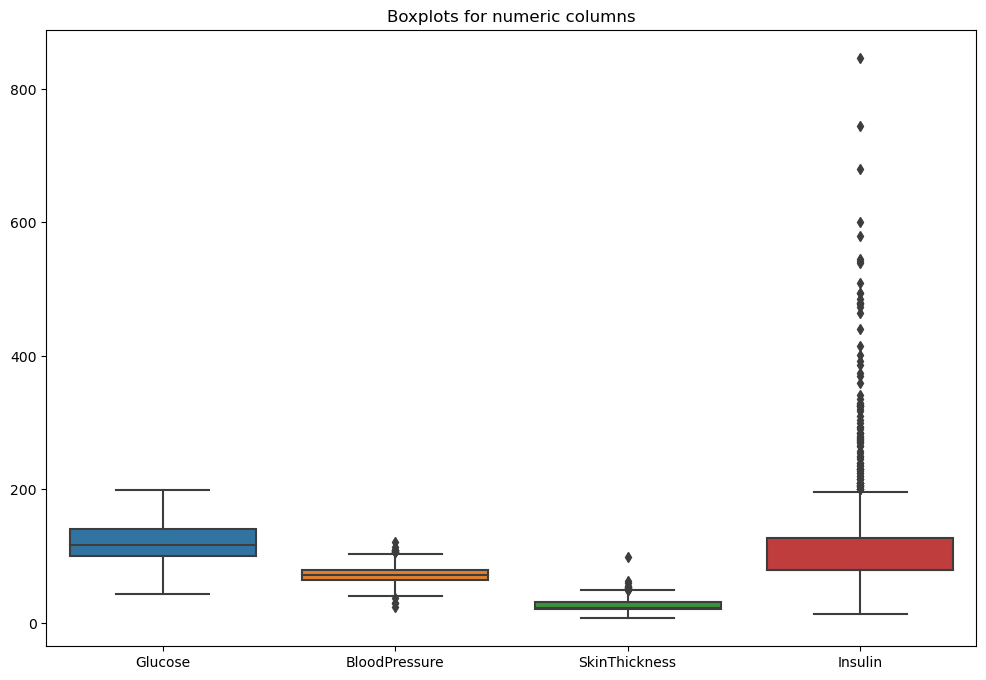

In [20]:
#Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=columns1)
plt.title("Boxplots for numeric columns")
plt.show

In [25]:
def find_outliers_iqr(data,column_name):
    Q1=data[column_name].quantile(0.25)
    Q3=data[column_name].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=data[(data[column_name]<lower_bound)| (data[column_name]>upper_bound)]
    count_outliers=len(outliers)
    return count_outliers
for column_name in columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}'column: {outlier_count}")

Number of outliers in the 'Glucose'column: 0
Number of outliers in the 'BloodPressure'column: 14
Number of outliers in the 'SkinThickness'column: 12
Number of outliers in the 'Insulin'column: 89
